In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scienceplots
import os
plt.style.use(['science','no-latex'])
name_dict = {'pre': 'QM Training (1k)',
             'post': 'QM Training + Observable Finetuning (1k)',
             '10k': 'QM Training (10k)',
             '50k': 'QM Training (50k)'}
            

def plot_stability_distribution(molecule, exp_dir):
    inference_dir = os.path.join(exp_dir, 'inference')
    plt.figure()
    for name in os.listdir(inference_dir):
        stab = np.load(os.path.join(inference_dir, name, 'replicas_stable_time.npy'))
        plt.hist(stab, label = name_dict[name], density=True, alpha=0.7)
    plt.title(molecule)
    plt.legend()
    plt.xlabel(f"Stable Simulation Time (ps)")
    plt.ylabel("Density")
    

def plot_rdfs(molecule, exp_dir):
    inference_dir = os.path.join(exp_dir, 'inference')
    plt.figure()
    gt_rdf = np.load(os.path.join(exp_dir, 'gt_rdf.npy'))
    plt.plot(np.linspace(0, 10, 500), gt_rdf, label = "True")
    for name in os.listdir(inference_dir):
        rdfs = []
        for i in range(300):
            path = os.path.join(inference_dir, name, f'rdf_epoch{i+1}.npy')
            if not os.path.exists(path):
                break
            rdfs.append(np.load(os.path.join(inference_dir, name, f'rdf_epoch{i+1}.npy')))
        plt.plot(np.linspace(0, 10, 500), np.stack(rdfs).mean(0), label = name_dict[name])
    plt.title(molecule)
    plt.legend()
    plt.xlabel(f"r (Angstroms)")
    plt.ylabel("h(r)")
    
def plot_adfs(molecule, exp_dir):
    inference_dir = os.path.join(exp_dir, 'inference')
    plt.figure()
#     gt_adf = np.load(os.path.join(exp_dir, 'gt_adf.npy'))
#     plt.plot(gt_adf, label = "True")
    for name in os.listdir(inference_dir):
        adfs = []
        for i in range(300):
            path = os.path.join(inference_dir, name, f'adf_epoch{i+1}.npy')
            if not os.path.exists(path):
                break
            adfs.append(np.load(os.path.join(inference_dir, name, f'adf_epoch{i+1}.npy')))
        plt.plot(np.stack(adfs).mean(0), label = name_dict[name])
    plt.title(molecule)
    plt.legend()
    plt.xlabel(f"Angle (degrees)")
    plt.ylabel("ADF")
    
def plot_vacfs(molecule, exp_dir):
    inference_dir = os.path.join(exp_dir, 'inference')
    plt.figure()
    gt_vacf = np.load(os.path.join(exp_dir, 'gt_vacf.npy'))
    x_axis = np.linspace(0, int(gt_vacf.shape[0]/2), gt_vacf.shape[0])
    plt.plot(x_axis, gt_vacf, label = "True")
    for name in os.listdir(inference_dir):
        vacfs = []
        for i in range(300):
            path = os.path.join(inference_dir, name, f'vacf_epoch{i+1}.npy')
            if not os.path.exists(path):
                break
            vacfs.append(np.load(os.path.join(inference_dir, name, f'vacf_epoch{i+1}.npy')))
        plt.plot(x_axis, np.stack(vacfs).mean(0), label = name_dict[name])
    plt.title(molecule)
    plt.legend()
    plt.xlabel(f"Time lag (fs)")
    plt.ylabel("Normalized VACF")
    


    

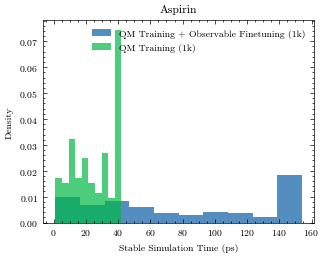

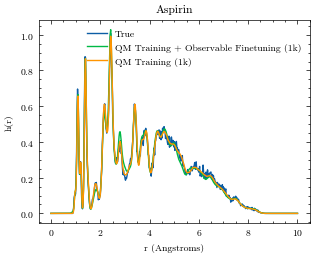

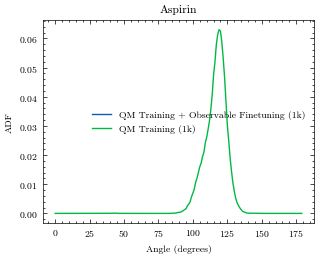

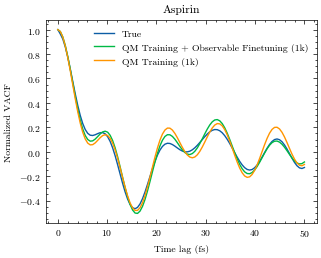

In [79]:
exp_dir = '/home/sanjeevr/implicit-md/results_nnip_continuous_new/IMPLICIT_schnet_aspirin_TEST_original'
plot_stability_distribution('Aspirin', exp_dir)
plot_rdfs('Aspirin', exp_dir)
plot_adfs('Aspirin', exp_dir)
plot_vacfs('Aspirin', exp_dir)


In [33]:
import matplotlib.pyplot as plt
import torch
import numpy as np
from pyemma.coordinates import tica
gt_data = np.load('/data/sanjeevr/md17/contiguous-md17/10k/val/nequip_npz.npz')
gt_traj = gt_data.f.R.reshape(-1, 63)
projected_data = tica(gt_traj, lag=50, dim=2).get_output()[0]

plt.scatter(projected_data[:, 0], projected_data[:, 1])
plt.hist2d(projected_data[:, 0], projected_data[:, 1], bins=(100, 100))
plt.colorbar()
plt.xlabel("TIC1")
plt.ylabel("TIC2")
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/data/sanjeevr/md17/contiguous-md17/10k/val/nequip_npz.npz'